In [2]:
!pip install spotipy pandas numpy matplotlib missingno scipy seaborn statsmodels sklearn

In [3]:
# Importer les bibliothèques nécessaires
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import json
import csv
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

# **Acquisition de données**

## **Acquisition à partir de l'API**

In [4]:
# Configurer les informations d'authentification
client_id = '94b56089f9144cc9bd0ab9a7d6bd238d'
client_secret = '8715a48fa8c14ce7b54b88659d00e214'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
# Récupérer les données de la playlist Top 2012 - 2022 de Spotify
audio_features = []
playlists = []
playlist_uris = [
    '37i9dQZF1DX18jTM2l2fJY', # 2022
    '37i9dQZF1DWTqOsMG7SsUt', # 2021
    '37i9dQZF1DX7Jl5KP2eZaS', # 2020
    '37i9dQZF1DWVRSukIED0e9', # 2019
    '37i9dQZF1DXe2bobNYDtW8', # 2018
    '37i9dQZF1DWTE7dVUebpUW', # 2017
    '37i9dQZF1DX8XZ6AUo9R4R', # 2016
    '37i9dQZF1DX9ukdrXQLJGZ', # 2015
    '37i9dQZF1DX0h0QnLkMBl4', # 2014
    '37i9dQZF1DX3Sp0P28SIer', # 2013
    '37i9dQZF1DX0yEZaMOXna3'  # 2012
]

for uri in playlist_uris:
    p = sp.playlist(f'spotify:playlist:{uri}')
    af = sp.audio_features([item['track']['id'] for item in p['tracks']['items']])
    playlists.append(p)
    audio_features.append(af)

### **Modélisation des jeux de données**

In [6]:
df = pd.DataFrame()

# Iterate over the playlists
for i, playlist in enumerate(playlists):
    tracks = playlist['tracks']['items']
    
    for track in tracks:
        artist = track['track']['artists'][0]['name']
        name = track['track']['name']
        popularity = track['track']['popularity']

        # Get the audio features of the track
        features = [features for features in audio_features[i] if features['id'] == track['track']['id']]
        features = features[0]

        # Add the data to the DataFrame
        df = df.append({
            'artist': artist,
            'name': name,
            'popularity': popularity,
            'danceability': features['danceability'],
            'energy': features['energy'],
            'key': features['key'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'acousticness': features['acousticness'],
            'instrumentalness': features['instrumentalness'],
            'liveness': features['liveness'],
            'valence': features['valence'],
            'tempo': features['tempo'],
            'duration_ms': features['duration_ms'],
            'time_signature': features['time_signature'],
        }, ignore_index=True);

/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: Future

/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: Future

/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: Future

/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: Future

/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: Future

/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: Future

/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_15174/1395509510.py:17: Future

In [7]:
# Save the DataFrame to a CSV file
df.to_csv("data.csv", index=False)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            970 non-null    object 
 1   name              970 non-null    object 
 2   popularity        970 non-null    int64  
 3   danceability      970 non-null    float64
 4   energy            970 non-null    float64
 5   key               970 non-null    int64  
 6   loudness          970 non-null    float64
 7   mode              970 non-null    int64  
 8   speechiness       970 non-null    float64
 9   acousticness      970 non-null    float64
 10  instrumentalness  970 non-null    float64
 11  liveness          970 non-null    float64
 12  valence           970 non-null    float64
 13  tempo             970 non-null    float64
 14  duration_ms       970 non-null    int64  
 15  time_signature    970 non-null    int64  
dtypes: float64(9), int64(5), object(2)
memory us

## **Acquisition à partir d'un fichier**

In [8]:
df_a = pd.read_csv('data/songs.csv');
df_b = pd.read_csv('data.csv');

# **Exploration des données**

In [9]:
df_a.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


In [10]:
df_b.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,970.0,78.653608,6.618267,55.000000,74.000000,79.00000,84.000000,96.000
danceability,970.0,0.671992,0.132693,0.188000,0.590000,0.68050,0.765750,0.964
energy,970.0,0.662171,0.163465,0.051900,0.554000,0.68300,0.789750,0.972
key,970.0,5.283505,3.621264,0.000000,2.000000,5.00000,8.000000,11.000
loudness,970.0,-5.909221,2.061201,-21.107000,-7.002250,-5.63650,-4.437250,-1.702
mode,970.0,0.592784,0.491569,0.000000,0.000000,1.00000,1.000000,1.000
speechiness,970.0,0.097544,0.092029,0.023200,0.040825,0.05755,0.107000,0.530
acousticness,970.0,0.180709,0.220689,0.000107,0.022725,0.08620,0.262250,0.978
instrumentalness,970.0,0.009071,0.067539,0.000000,0.000000,0.00000,0.000037,0.896
liveness,970.0,0.171623,0.129349,0.021000,0.092700,0.11800,0.211000,0.960


## **Nettoyage et mise en forme des données**

### **Vérifier les valeurs manquantes dans l'ensemble des données**

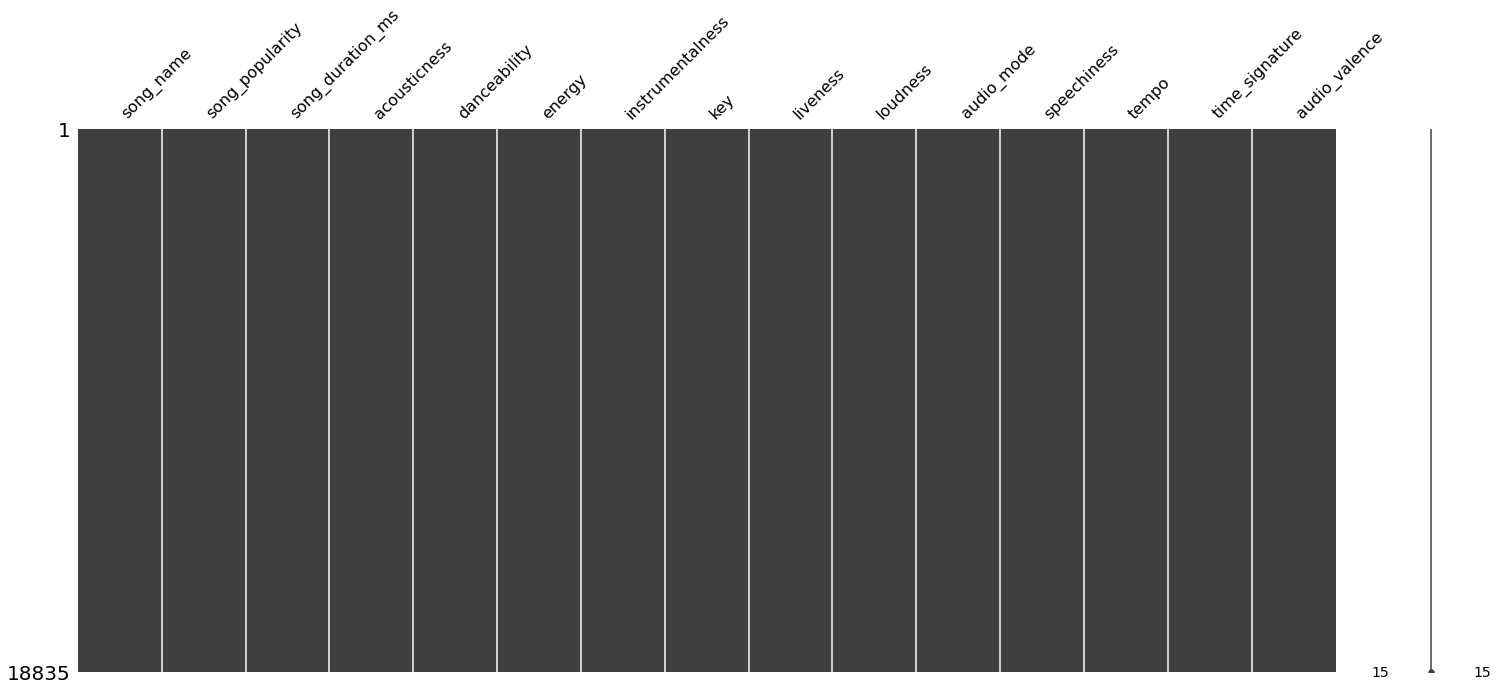

In [12]:
msno.matrix(df_a);

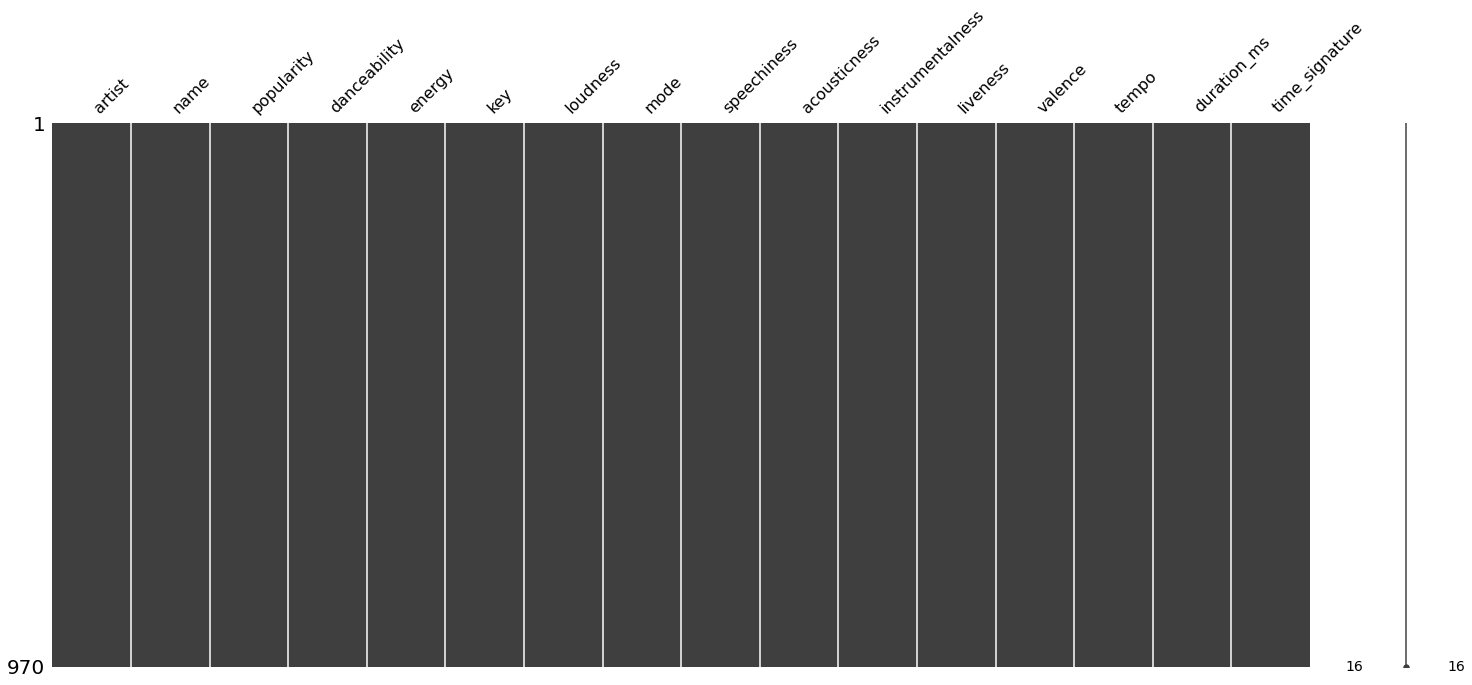

In [13]:
msno.matrix(df_b);

This is a pretty small and clean data set, and there's no missing values out of the 100 tracks in this playlist.


### **Normalisation/standardisation des valeurs des caractéristiques**

In [14]:
# convert milliseconds to seconds
df['duration_ms'].mul(1000)

# rename column from 'duration_ms' to just 'duration'
df = df.rename({'duration_ms': 'duration'}, axis=1)

df["class"] = [ 1 if i>=66.5 else 0 for i in df.popularity ]

In [17]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            970 non-null    object 
 1   name              970 non-null    object 
 2   popularity        970 non-null    int64  
 3   danceability      970 non-null    float64
 4   energy            970 non-null    float64
 5   key               970 non-null    int64  
 6   loudness          970 non-null    float64
 7   mode              970 non-null    int64  
 8   speechiness       970 non-null    float64
 9   acousticness      970 non-null    float64
 10  instrumentalness  970 non-null    float64
 11  liveness          970 non-null    float64
 12  valence           970 non-null    float64
 13  tempo             970 non-null    float64
 14  duration          970 non-null    int64  
 15  time_signature    970 non-null    int64  
 16  class             970 non-null    int64  
dt

## **Exploration des données avec des graphiques**

- duration : La durée de la piste en millisecondes.

- key : La tonalité globale estimée de la piste. Les nombres entiers correspondent à des hauteurs en utilisant la notation standard des classes de hauteur. Par exemple, 0 = C, 1 = C♯/D♭, 2 = D, etc. Si aucune touche n'a été détectée, la valeur est -1.

- mode : Mode indique la modalité (majeure ou mineure) d'une piste, le type d'échelle à partir duquel son contenu mélodique est dérivé. Le mode majeur est représenté par 1 et le mode mineur par 0.

- Time signature : Une estimation de la signature temporelle globale d'une piste. La signature temporelle (mètre) est une convention de notation permettant de spécifier le nombre de battements dans chaque mesure.

- acousticness (qualité acoustique) : Une mesure de confiance de 0,0 à 1,0 indiquant si la piste est acoustique. Une valeur de 1,0 représente une confiance élevée dans le fait que la piste est acoustique.

- capacité de danse : L'aptitude à la danse décrit dans quelle mesure un morceau se prête à la danse en se basant sur une combinaison d'éléments musicaux tels que le tempo, la stabilité du rythme, la force du battement et la régularité générale. Une valeur de 0,0 est la moins dansable et une valeur de 1,0 est la plus dansable.

- énergie : L'énergie est une mesure allant de 0,0 à 1,0 et représente une mesure perceptuelle de l'intensité et de l'activité. En règle générale, les morceaux énergiques sont rapides, forts et bruyants. Par exemple, le death metal a une énergie élevée, tandis qu'un prélude de Bach obtient un score faible sur l'échelle.

- l'instrumentalité : Détecte la présence d'un public dans l'enregistrement. Des valeurs de vivacité plus élevées représentent une probabilité accrue que la piste ait été jouée en direct. Une valeur supérieure à 0,8 indique une forte probabilité que la piste soit jouée en direct.

- loudness (intensité sonore) : L'intensité sonore globale d'une piste en décibels (dB). Les valeurs d'intensité sonore sont calculées en moyenne sur l'ensemble de la piste et sont utiles pour comparer l'intensité sonore relative des pistes. L'intensité sonore est la qualité d'un son qui est le principal corrélat psychologique de la force physique (amplitude). Les valeurs se situent généralement entre -60 et 0 db.

- Qualité de la parole : L'intensité vocale détecte la présence de mots parlés dans une piste. Plus l'enregistrement est exclusivement vocal (par exemple, talk-show, livre audio, poésie), plus la valeur de l'attribut est proche de 1,0. Les valeurs supérieures à 0,66 décrivent des pistes qui sont probablement composées exclusivement de paroles. Les valeurs comprises entre 0,33 et 0,66 décrivent des pistes qui peuvent contenir à la fois de la musique et de la parole, soit en sections, soit en couches, y compris des cas tels que la musique rap.

- valence : Une mesure de 0,0 à 1,0 décrivant la positivité musicale véhiculée par une piste. Les pistes ayant une valence élevée sont plus positives (par exemple, joyeuses, gaies, euphoriques), tandis que les pistes ayant une valence faible sont plus négatives (par exemple, tristes, déprimées, en colère).

- tempo : le tempo global estimé d'une piste en battements par minute (BPM). Dans la terminologie musicale, le tempo est la vitesse ou le rythme d'un morceau donné et découle directement de la durée moyenne des battements.

- song_popularity (popularité des chansons) : Classement des chansons par l'audience de Spotify.

- liveness : Détecte la présence d'un public dans l'enregistrement. Plus la valeur de liveness est élevée, plus il est probable que le morceau ait été joué en direct.


### **Artistes ayant plus de cinq titres**

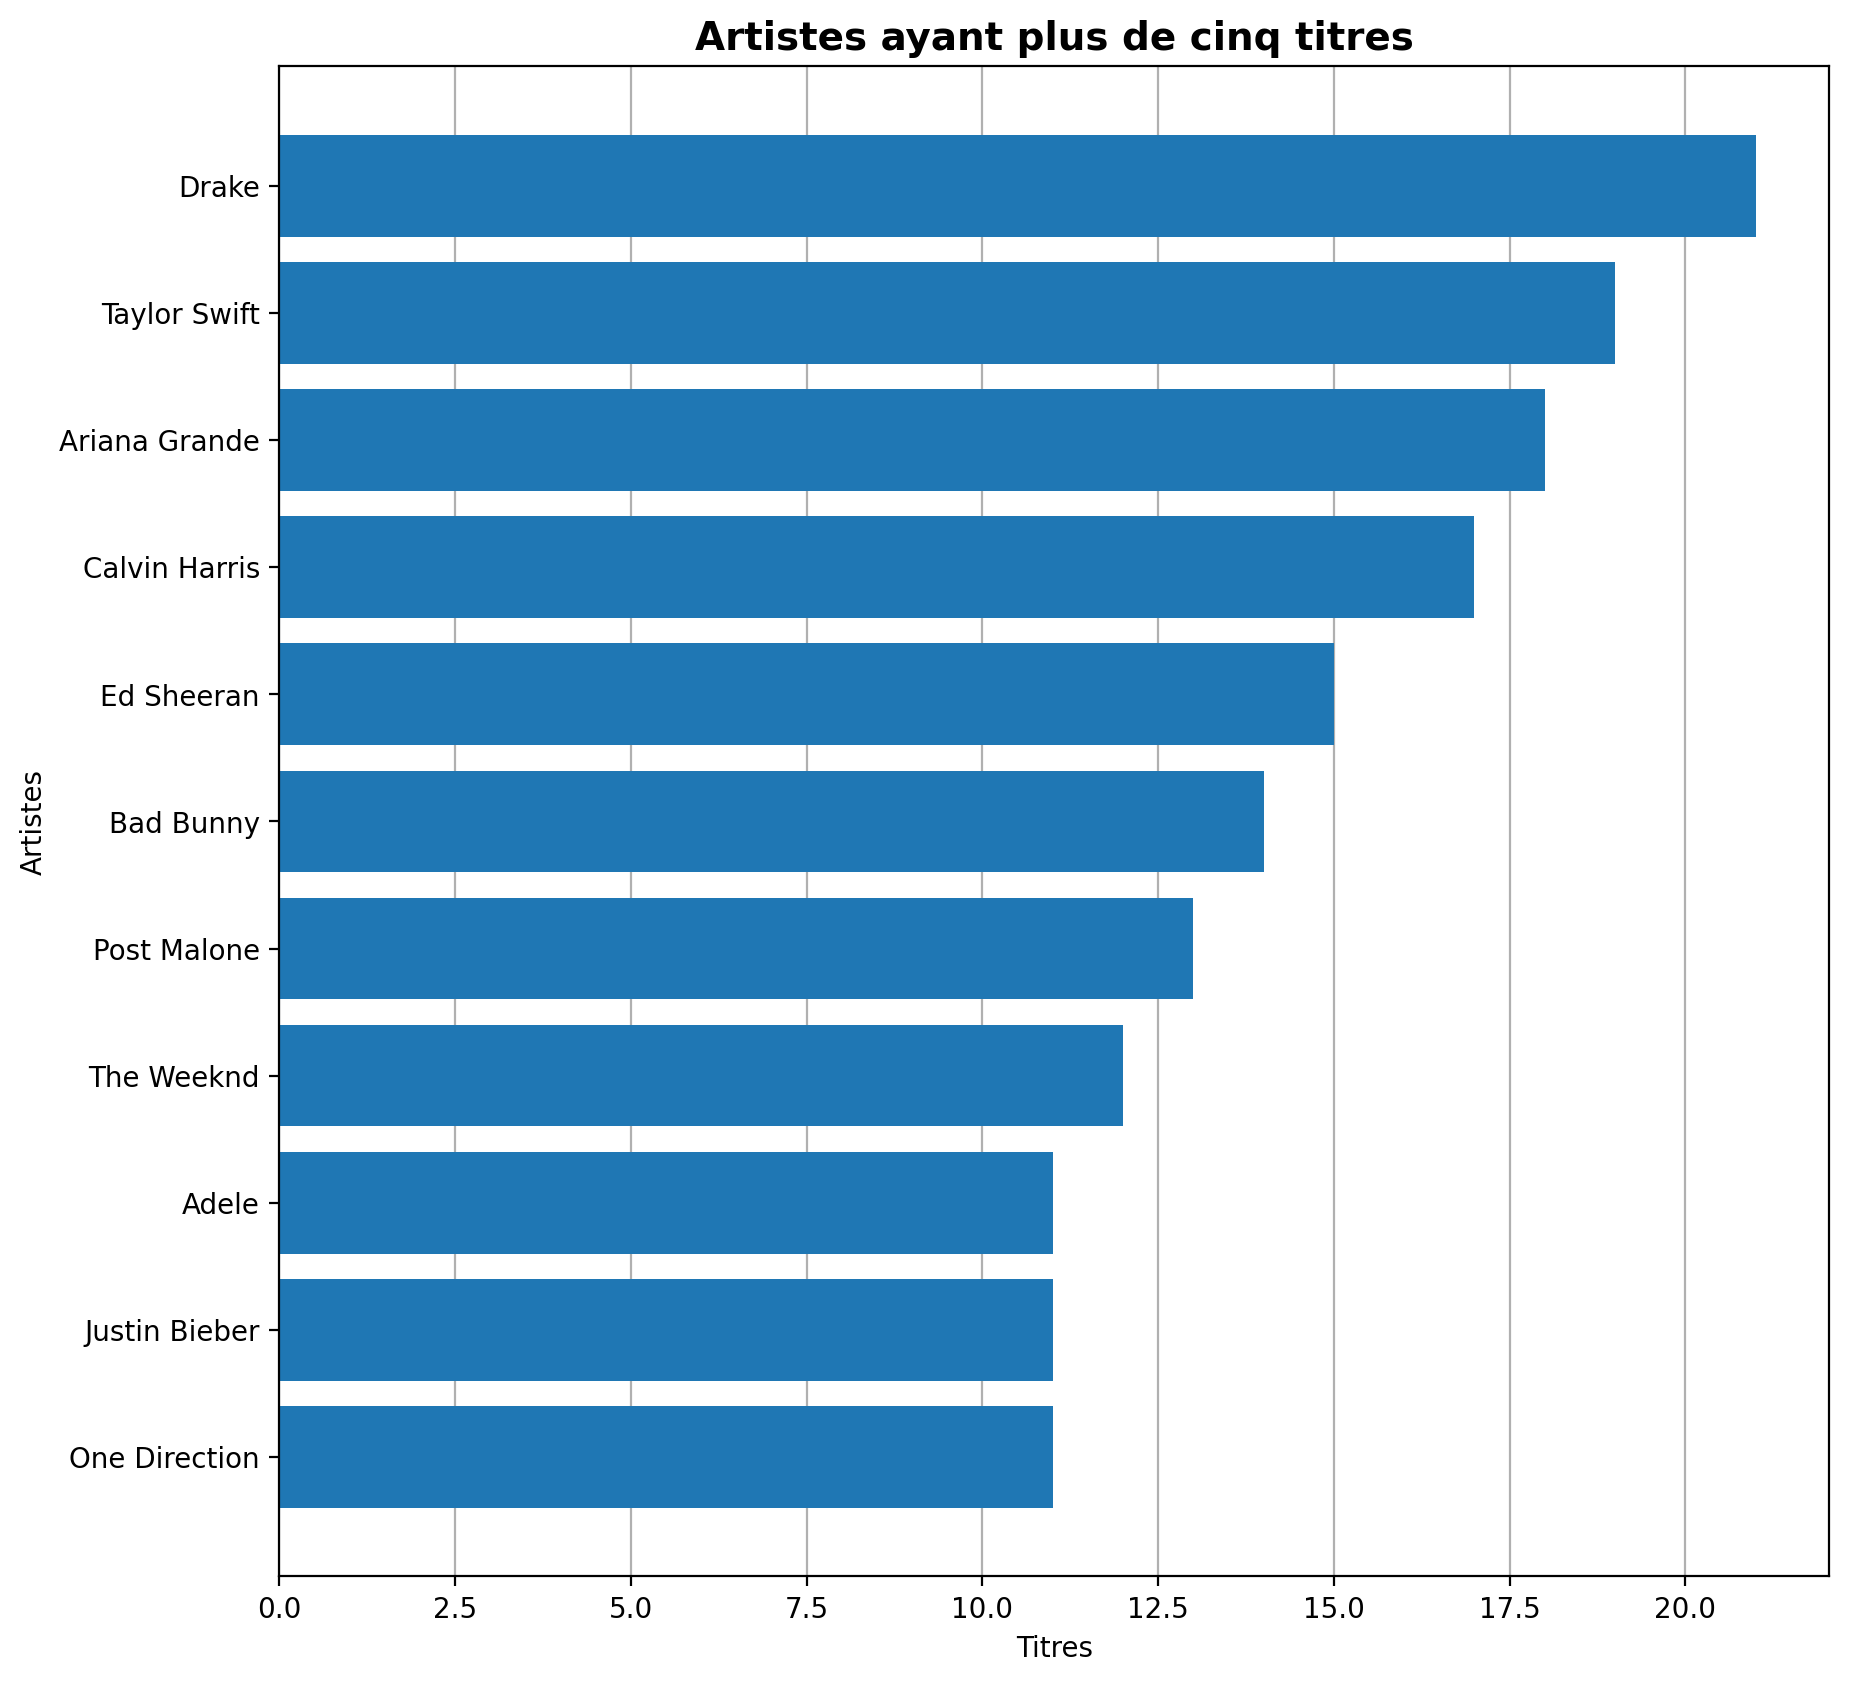

In [19]:
# Group by artist_name and count the number of tracks
top_artists = df_b.groupby('artist')['name'].count().reset_index(name='count')

# Remove artists with a count less than or equal to 1
top_artists = top_artists[top_artists['count'] > 10]

# Sort the artists by count in descending order
top_artists = top_artists.sort_values('count', ascending=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
ax.barh(top_artists['artist'], top_artists['count'], zorder=2)

# Reverse the axis so that the artist names are displayed vertically
ax.invert_yaxis()

# Set the labels and title
ax.set_xlabel("Titres")
ax.set_ylabel("Artistes")
ax.set_title("Artistes ayant plus de cinq titres")

# Remove the legend and increase the size and boldness of the title
ax.title.set_size(14)
ax.title.set_weight('bold')

# Set the grid lines behind the bars
ax.grid(axis='x', zorder=0)

plt.show()

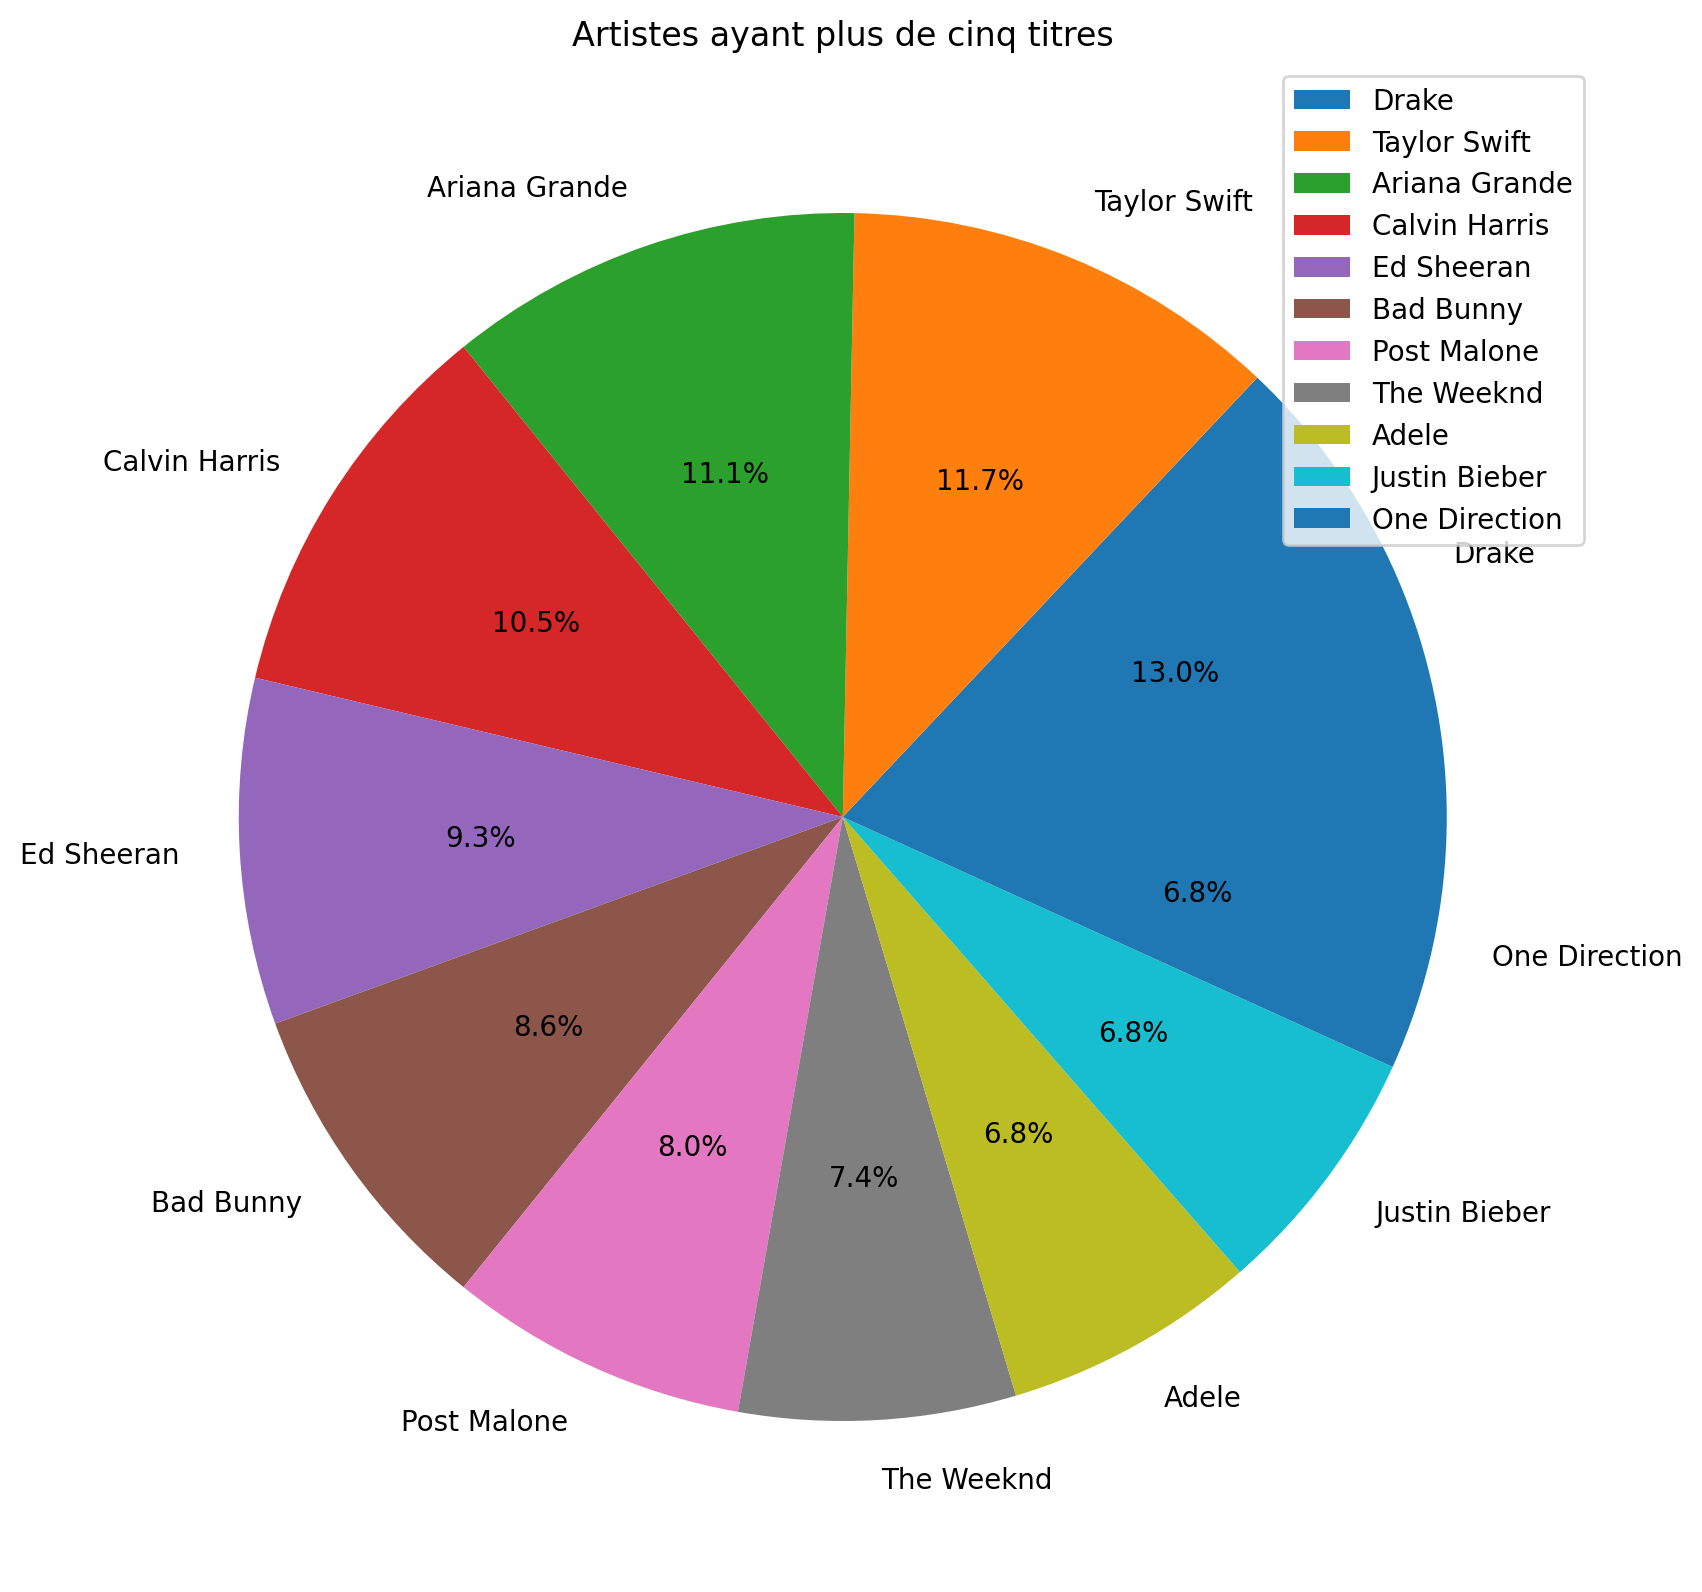

In [20]:
# Group by artist_name and count the number of tracks
top_artists = df_b.groupby('artist')['name'].count().reset_index(name='count')

# Remove artists with a count less than or equal to 1
top_artists = top_artists[top_artists['count'] > 10]

# Sort the artists by count in descending order
top_artists = top_artists.sort_values('count', ascending=False)

# Create a list of the artist names
artist_names = top_artists['artist'].tolist()

# Create a list of the number of tracks for each artist
track_counts = top_artists['count'].tolist()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
plt.pie(track_counts, labels=artist_names, autopct='%1.1f%%')

# Set the title
plt.title('Artistes ayant plus de cinq titres')

# Add a legend
plt.legend(artist_names)

# Show the pie chart
plt.show()

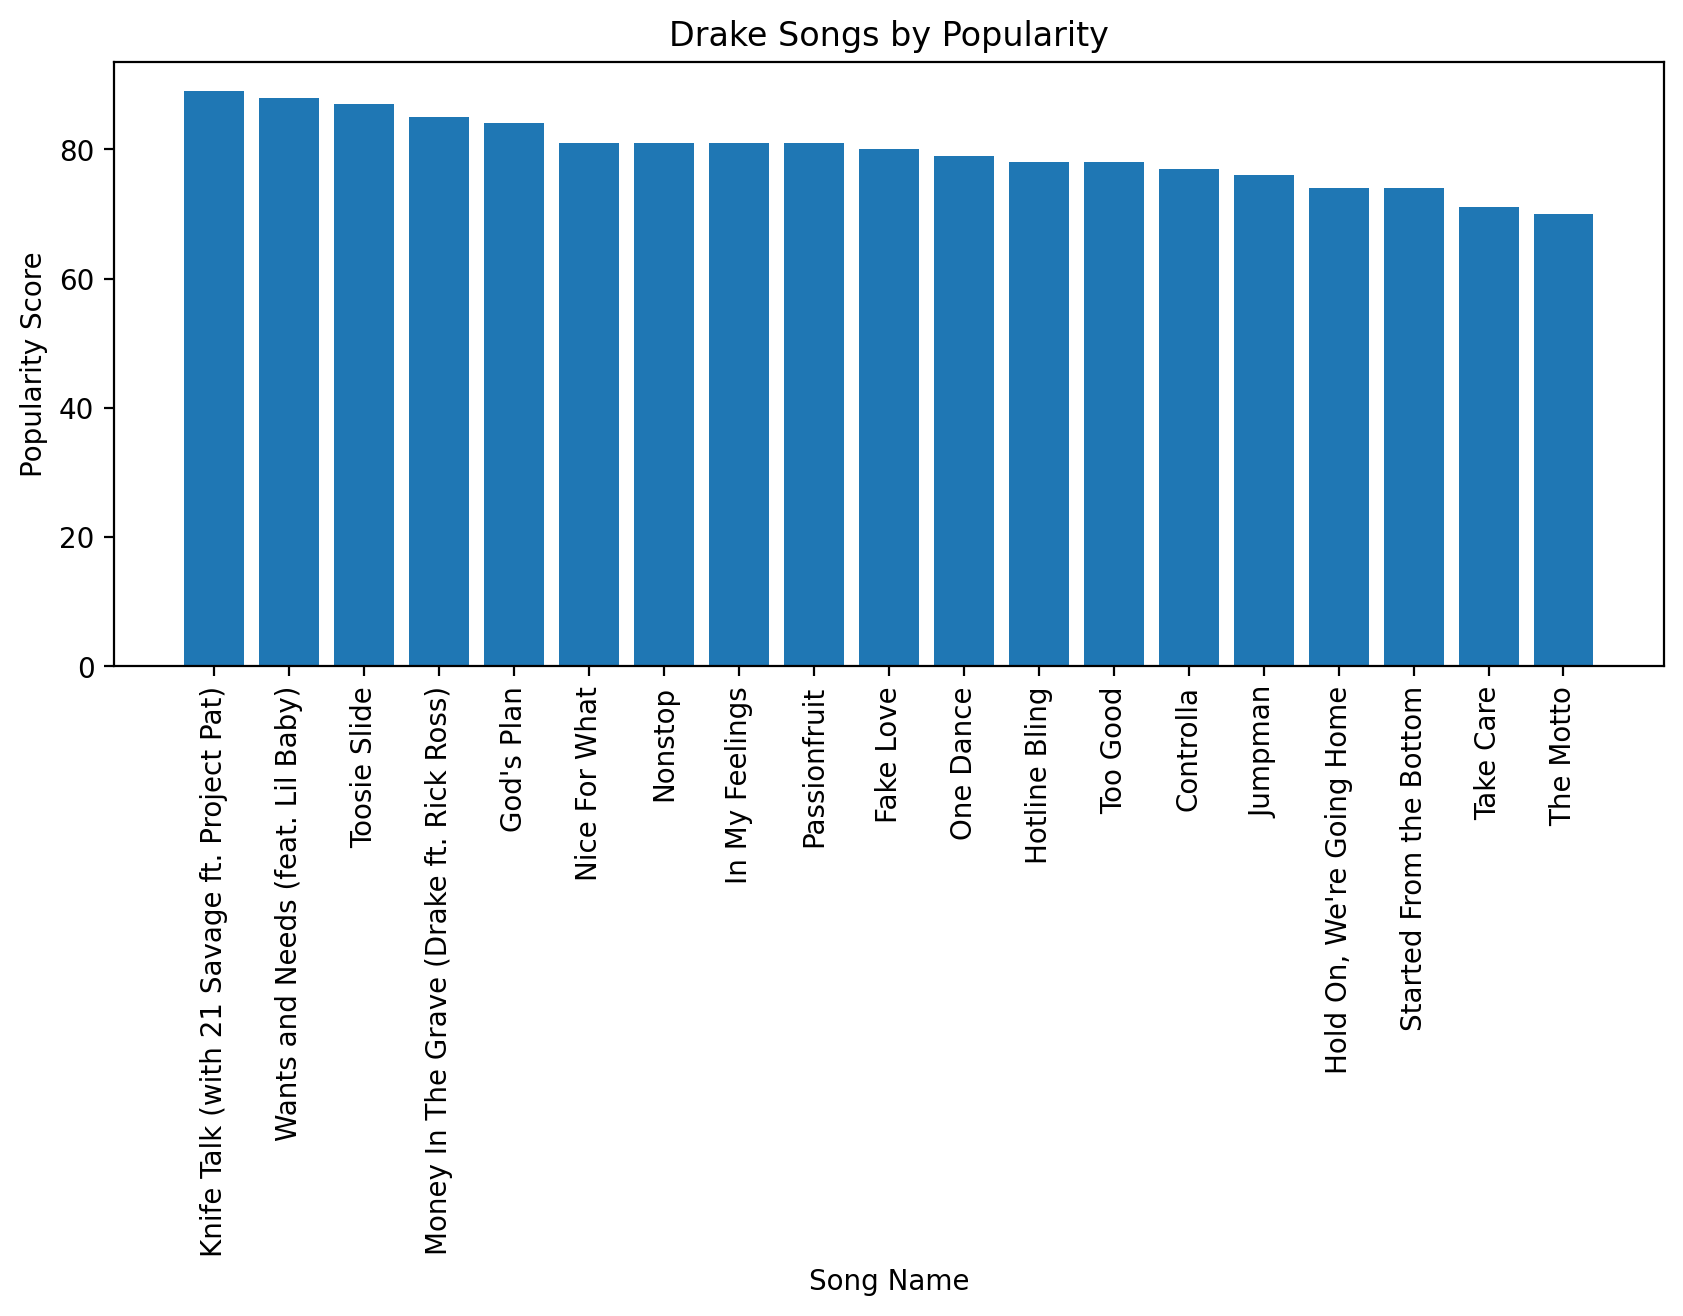

In [21]:
# Get the data
df_drake = df_b.loc[df_b['artist'] == 'Drake']

# Get the popularity scores
popularity_scores = df_drake['popularity'].tolist()

# Create a list of the song names
song_names = df_drake['name'].tolist()

# Create a bar chart
popularity_scores.sort(reverse=True)
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
plt.bar(song_names, popularity_scores)

# Set the title
plt.title('Drake Songs by Popularity')

# Set the x-axis label
plt.xlabel('Song Name')

# Set the y-axis label
plt.ylabel('Popularity Score')
plt.xticks(rotation=90)

# Show the bar chart
plt.show()

In [22]:
def plot_audio_feature(df, label, bins=25, stats=False, density=True, limit=1):
    # Plot the histogram
    fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
    ax.hist(df, bins=bins, color='dodgerblue', edgecolor='white')

    # Plot the density curve
    if (density == True):
        ax2 = ax.twinx()
        sns.kdeplot(df, color='red', linewidth=2, ax=ax2)
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.yaxis.set_visible(False)

    # Set the labels and title
    ax.set_xlabel(label)
    ax.set_ylabel("Titres")
    ax.set_title(f'Caractéristique: {label}')
    ax.title.set_size(14)
    ax.title.set_weight('bold')


    # Set axes limits
    ax.set_xlim([0, limit])

    plt.show();
    if (stats == True):
        print("Observed value :", df.count())
        print("Maximum value :", round(df.max(), 2))
        print("Minimum value :", round(df.min(), 2))
        print("Mean value : ", round(df.mean(), 2))
        print("The variance :", round(df.var(), 2))
        print("The Standard deviation : ", round(df.std(), 2))

### **Danceability** 

capacité de danse : L'aptitude à la danse décrit dans quelle mesure un morceau se prête à la danse en se basant sur une combinaison d'éléments musicaux tels que le tempo, la stabilité du rythme, la force du battement et la régularité générale. Une valeur de 0,0 est la moins dansable et une valeur de 1,0 est la plus dansable.

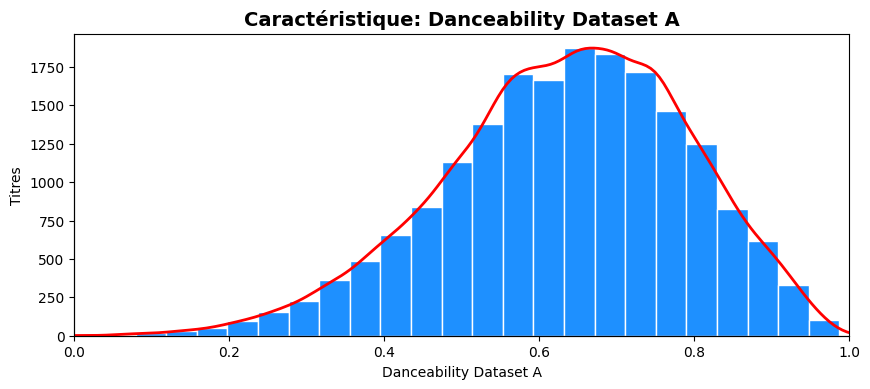

Observed value : 18835
Maximum value : 0.99
Minimum value : 0.0
Mean value :  0.63
The variance : 0.02
The Standard deviation :  0.16


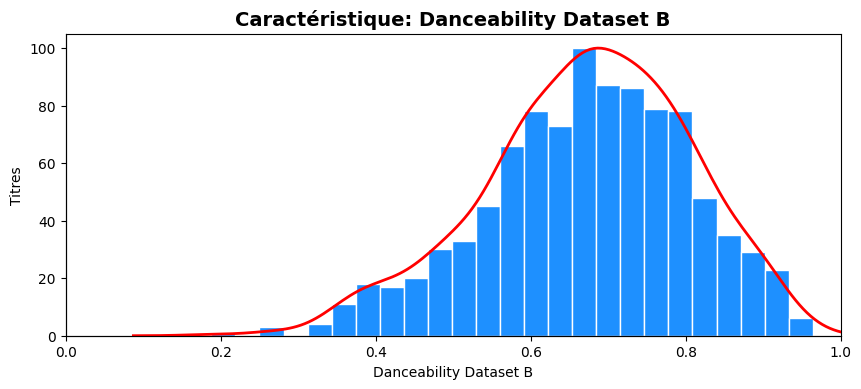

Observed value : 970
Maximum value : 0.96
Minimum value : 0.19
Mean value :  0.67
The variance : 0.02
The Standard deviation :  0.13


In [23]:
plot_audio_feature(df_a['danceability'], label="Danceability Dataset A", stats=True)
plot_audio_feature(df_b['danceability'], label="Danceability Dataset B", stats=True)

### **Energy**

énergie : L'énergie est une mesure allant de 0,0 à 1,0 et représente une mesure perceptuelle de l'intensité et de l'activité. En règle générale, les morceaux énergiques sont rapides, forts et bruyants. Par exemple, le death metal a une énergie élevée, tandis qu'un prélude de Bach obtient un score faible sur l'échelle.

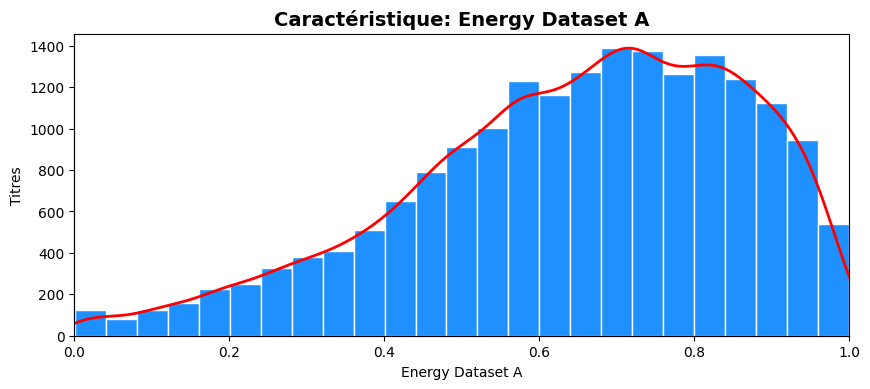

Observed value : 18835
Maximum value : 1.0
Minimum value : 0.0
Mean value :  0.64
The variance : 0.05
The Standard deviation :  0.21


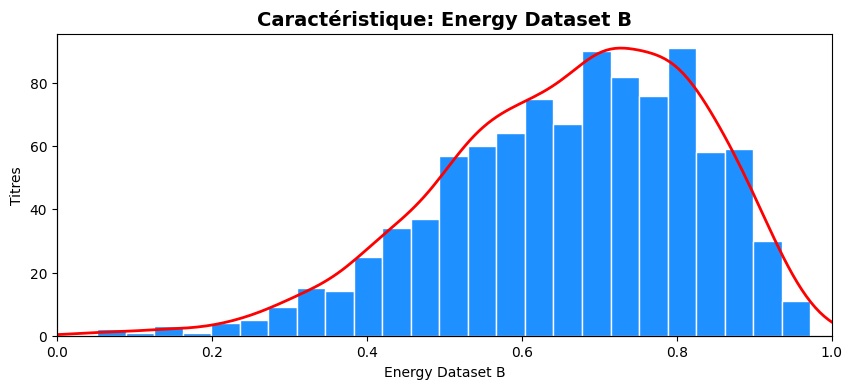

Observed value : 970
Maximum value : 0.97
Minimum value : 0.05
Mean value :  0.66
The variance : 0.03
The Standard deviation :  0.16


In [24]:
plot_audio_feature(df_a['energy'], 'Energy Dataset A', stats=True)
plot_audio_feature(df_b['energy'], 'Energy Dataset B', stats=True)

### **Tonalité des titres**

https://en.wikipedia.org/wiki/Key_signature

In [25]:
df['key_name'] = None

df['key_name'].where(~(df['key'] == 0), "C", inplace=True)
df['key_name'].where(~(df['key'] == 1), "C#", inplace=True)
df['key_name'].where(~(df['key'] == 2), "D", inplace=True)
df['key_name'].where(~(df['key'] == 3), "D#", inplace=True)
df['key_name'].where(~(df['key'] == 4), "E", inplace=True)
df['key_name'].where(~(df['key'] == 5), "F", inplace=True)
df['key_name'].where(~(df['key'] == 6), "F#", inplace=True)
df['key_name'].where(~(df['key'] == 7), "G", inplace=True)
df['key_name'].where(~(df['key'] == 8), "G#", inplace=True)
df['key_name'].where(~(df['key'] == 9), "A", inplace=True)
df['key_name'].where(~(df['key'] == 10), "A#", inplace=True)
df['key_name'].where(~(df['key'] == 11), "B", inplace=True)

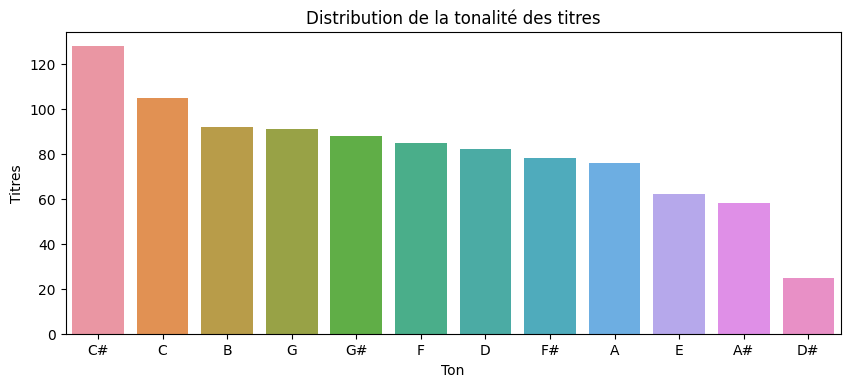

In [26]:
# group by 'key' and calculate the count of each key
song_keys = df.groupby('key_name').size().reset_index(name='n_key')

# sort the keys by count of occurrences
song_keys = song_keys.sort_values('n_key', ascending=False)

# sort categorical order
song_keys['key_name'] = pd.Categorical(song_keys['key_name'], categories=song_keys['key_name'].tolist())

# plot the bar graph
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
sns.barplot(x='key_name', y='n_key', data=song_keys)
ax.set_title('Distribution de la tonalité des titres')
ax.set_xlabel('Ton')
ax.set_ylabel('Titres')

plt.show();

### **Loudness**

loudness (intensité sonore) : L'intensité sonore globale d'une piste en décibels (dB). Les valeurs d'intensité sonore sont calculées en moyenne sur l'ensemble de la piste et sont utiles pour comparer l'intensité sonore relative des pistes. L'intensité sonore est la qualité d'un son qui est le principal corrélat psychologique de la force physique (amplitude). Les valeurs se situent généralement entre -60 et 0 db.

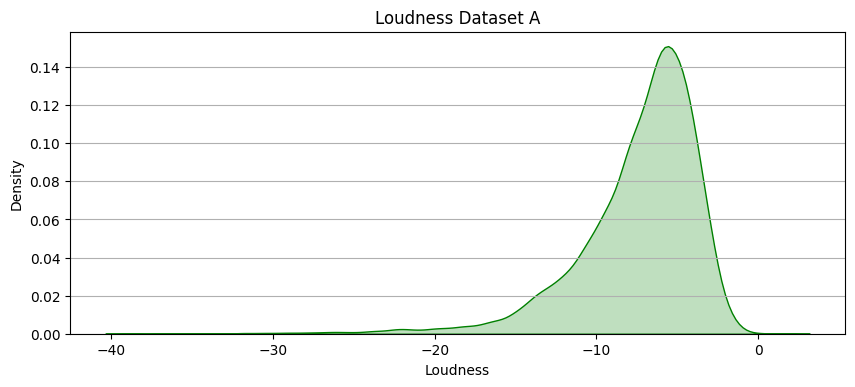

Observed value : 18835
Maximum value : 1.58
Minimum value : -38.77
Mean value :  -7.45
The variance : 14.65
The Standard deviation :  3.83


In [27]:
# extraire la variable loudness
loudness = df_a['loudness']

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
sns.kdeplot(loudness, shade=True, color='green')

ax.set_title('Loudness Dataset A')
ax.set_xlabel('Loudness')
ax.set_ylabel('Density')
ax.yaxis.grid(True)

plt.show();
print("Observed value :", loudness.count())
print("Maximum value :", round(loudness.max(), 2))
print("Minimum value :", round(loudness.min(), 2))
print("Mean value : ", round(loudness.mean(), 2))
print("The variance :", round(loudness.var(), 2))
print("The Standard deviation : ", round(loudness.std(), 2))

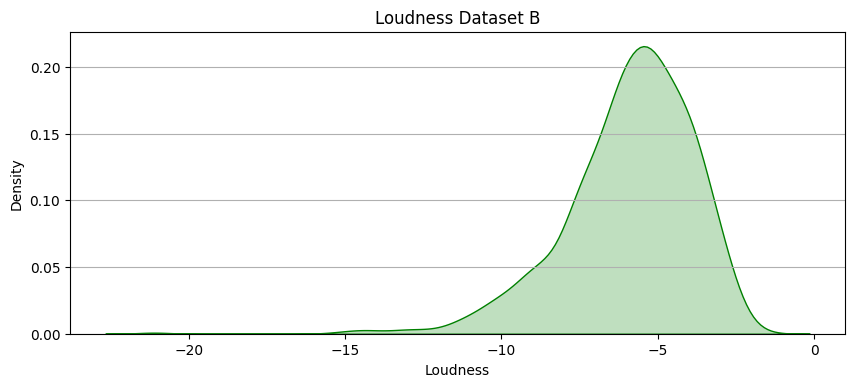

Observed value : 970
Maximum value : -1.7
Minimum value : -21.11
Mean value :  -5.91
The variance : 4.25
The Standard deviation :  2.06


In [28]:
# extraire la variable loudness
loudness = df_b['loudness']

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
sns.kdeplot(loudness, shade=True, color='green')

ax.set_title('Loudness Dataset B')
ax.set_xlabel('Loudness')
ax.set_ylabel('Density')
ax.yaxis.grid(True)

plt.show();
print("Observed value :", loudness.count())
print("Maximum value :", round(loudness.max(), 2))
print("Minimum value :", round(loudness.min(), 2))
print("Mean value : ", round(loudness.mean(), 2))
print("The variance :", round(loudness.var(), 2))
print("The Standard deviation : ", round(loudness.std(), 2))

### **Mode**

Mode indique la modalité (majeure ou mineure) d'une piste, le type d'échelle à partir duquel son contenu mélodique est dérivé. Le mode majeur est représenté par 1 et le mode mineur par 0.

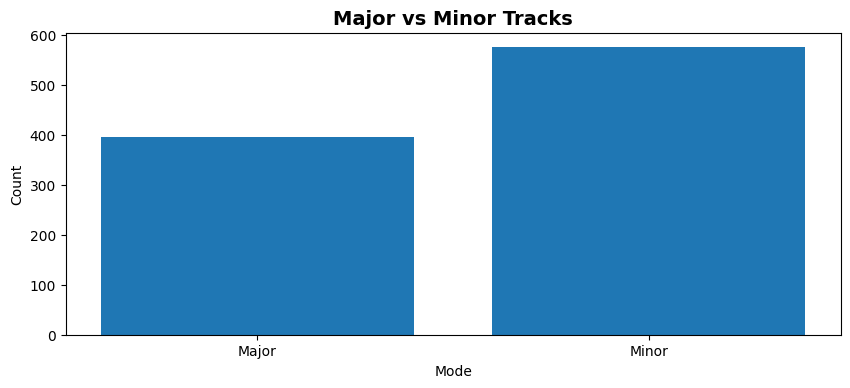

In [29]:
mode = df['mode']
mode.where(~(df['mode'] == 0), 'Major', inplace=True)
mode.where(~(df['mode'] == 1), 'Minor', inplace=True)

plt.figure(figsize=(10, 4), dpi=100)
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Major vs Minor Tracks', fontweight='bold', fontsize=14)

labels, counts = np.unique(mode, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show();

**Conclusion**: Major key tracks are preferred over minor key tracks. This is expected, since major key sounds happier than minor key.

### **Speechiness**

Qualité de la parole : L'intensité vocale détecte la présence de mots parlés dans une piste. Plus l'enregistrement est exclusivement vocal (par exemple, talk-show, livre audio, poésie), plus la valeur de l'attribut est proche de 1,0. Les valeurs supérieures à 0,66 décrivent des pistes qui sont probablement composées exclusivement de paroles. Les valeurs comprises entre 0,33 et 0,66 décrivent des pistes qui peuvent contenir à la fois de la musique et de la parole, soit en sections, soit en couches, y compris des cas tels que la musique rap.

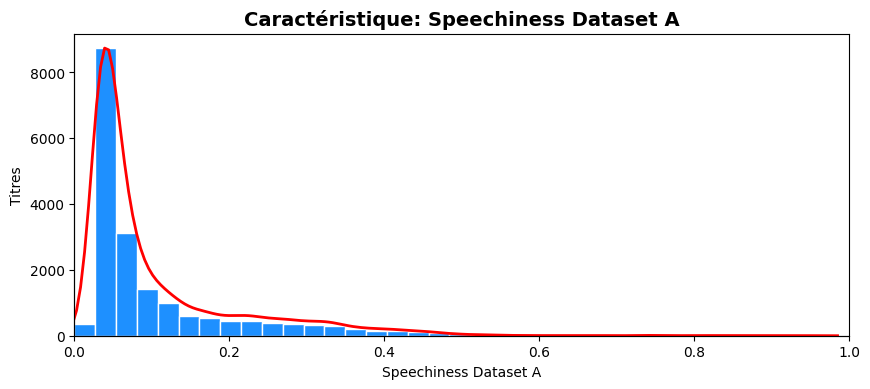

Observed value : 18835
Maximum value : 0.94
Minimum value : 0.0
Mean value :  0.1
The variance : 0.01
The Standard deviation :  0.1


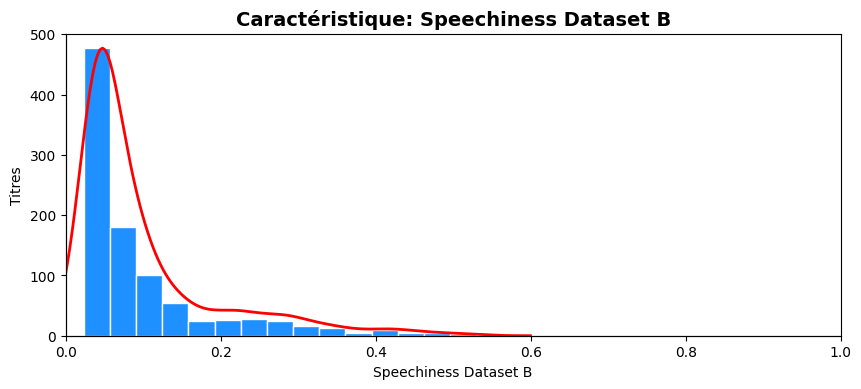

Observed value : 970
Maximum value : 0.53
Minimum value : 0.02
Mean value :  0.1
The variance : 0.01
The Standard deviation :  0.09


In [30]:
plot_audio_feature(df_a['speechiness'], 'Speechiness Dataset A', bins=35, stats=True)
plot_audio_feature(df_b['speechiness'], 'Speechiness Dataset B', bins=15, stats=True)

### **Acousticness**

acousticness (qualité acoustique) : Une mesure de confiance de 0,0 à 1,0 indiquant si la piste est acoustique. Une valeur de 1,0 représente une confiance élevée dans le fait que la piste est acoustique.

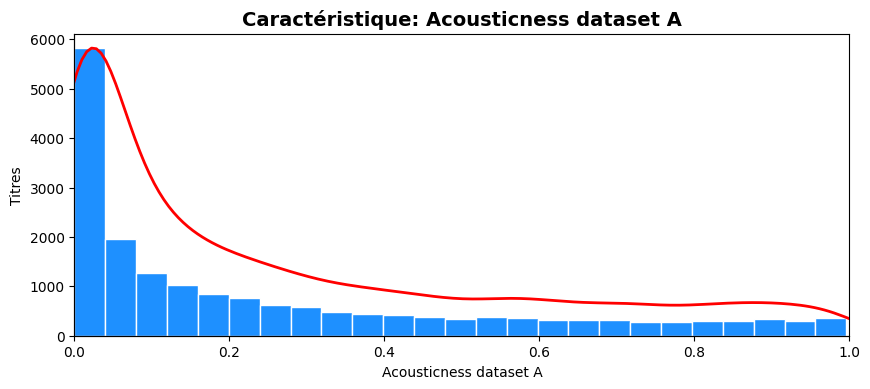

Observed value : 18835
Maximum value : 1.0
Minimum value : 0.0
Mean value :  0.26
The variance : 0.08
The Standard deviation :  0.29


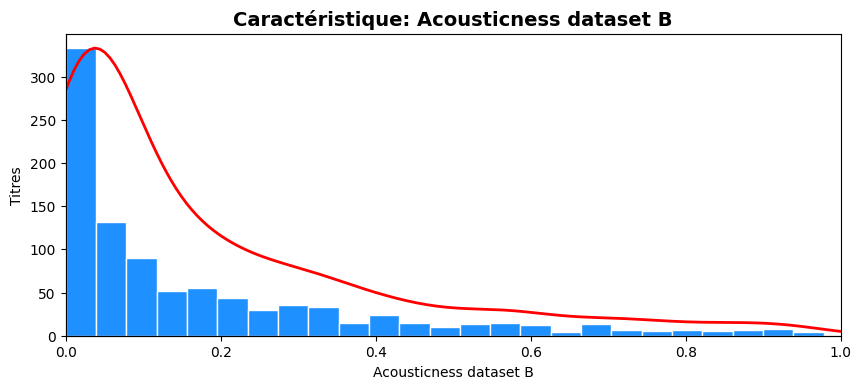

Observed value : 970
Maximum value : 0.98
Minimum value : 0.0
Mean value :  0.18
The variance : 0.05
The Standard deviation :  0.22


In [31]:
plot_audio_feature(df_a['acousticness'], 'Acousticness dataset A', stats=True)
plot_audio_feature(df_b['acousticness'], 'Acousticness dataset B', stats=True)

### **Instrumentalness**

l'instrumentalité : Détecte la présence d'un public dans l'enregistrement. Des valeurs de vivacité plus élevées représentent une probabilité accrue que la piste ait été jouée en direct. Une valeur supérieure à 0,8 indique une forte probabilité que la piste soit jouée en direct.

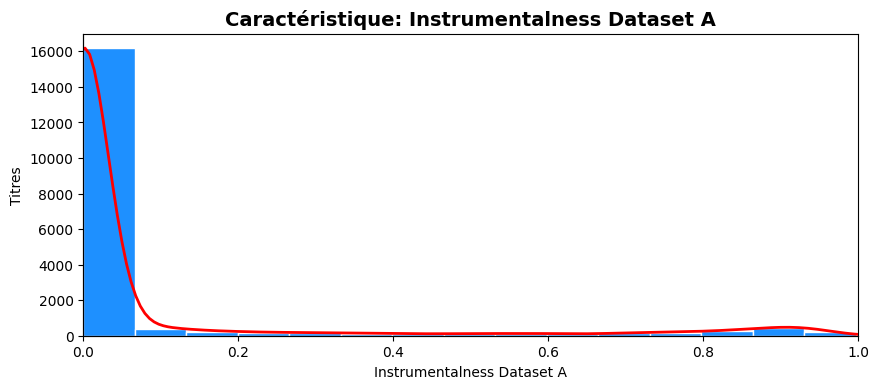

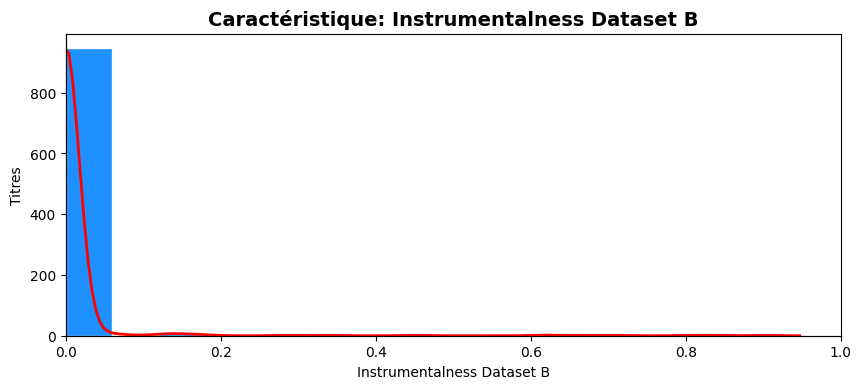

In [32]:
plot_audio_feature(df_a['instrumentalness'], 'Instrumentalness Dataset A', bins=15)
plot_audio_feature(df_b['instrumentalness'], 'Instrumentalness Dataset B', bins=15)

### **Liveness**

liveness : Détecte la présence d'un public dans l'enregistrement. Plus la valeur de liveness est élevée, plus il est probable que le morceau ait été joué en direct.

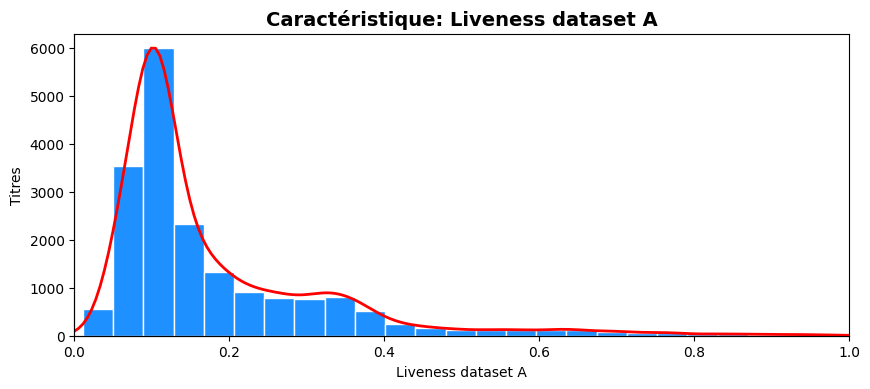

Observed value : 18835
Maximum value : 0.99
Minimum value : 0.01
Mean value :  0.18
The variance : 0.02
The Standard deviation :  0.14


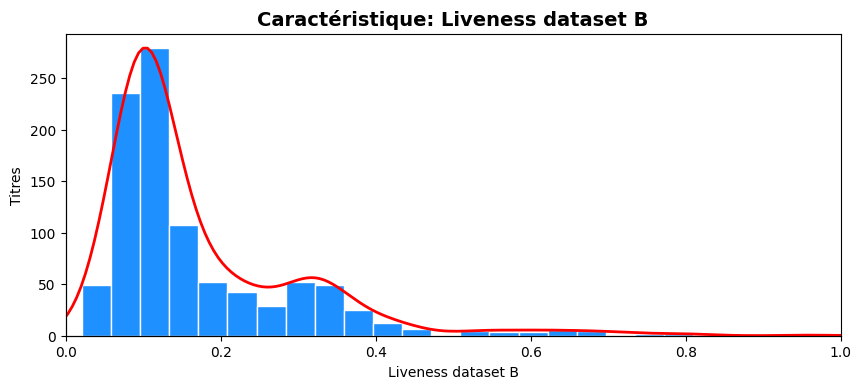

Observed value : 970
Maximum value : 0.96
Minimum value : 0.02
Mean value :  0.17
The variance : 0.02
The Standard deviation :  0.13


In [33]:
plot_audio_feature(df_a['liveness'], 'Liveness dataset A', stats=True)
plot_audio_feature(df_b['liveness'], 'Liveness dataset B', stats=True)

### **Valence**

Une mesure de 0,0 à 1,0 décrivant la positivité musicale véhiculée par une piste. Les pistes ayant une valence élevée sont plus positives (par exemple, joyeuses, gaies, euphoriques), tandis que les pistes ayant une valence faible sont plus négatives (par exemple, tristes, déprimées, en colère).

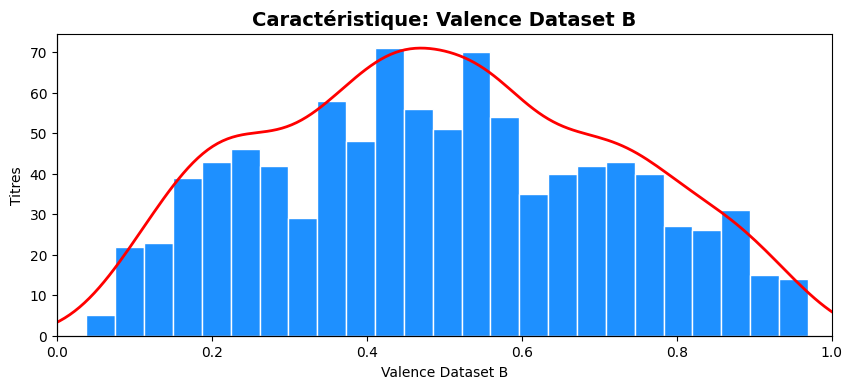

Observed value : 970
Maximum value : 0.97
Minimum value : 0.04
Mean value :  0.49
The variance : 0.05
The Standard deviation :  0.22


In [34]:
plot_audio_feature(df_b['valence'], 'Valence Dataset B', stats=True)

### **Correlation/collinearity analysis**
In order to understand the correlation between variables, I’ll use corrplot function, which is one of the base data visualization functions.

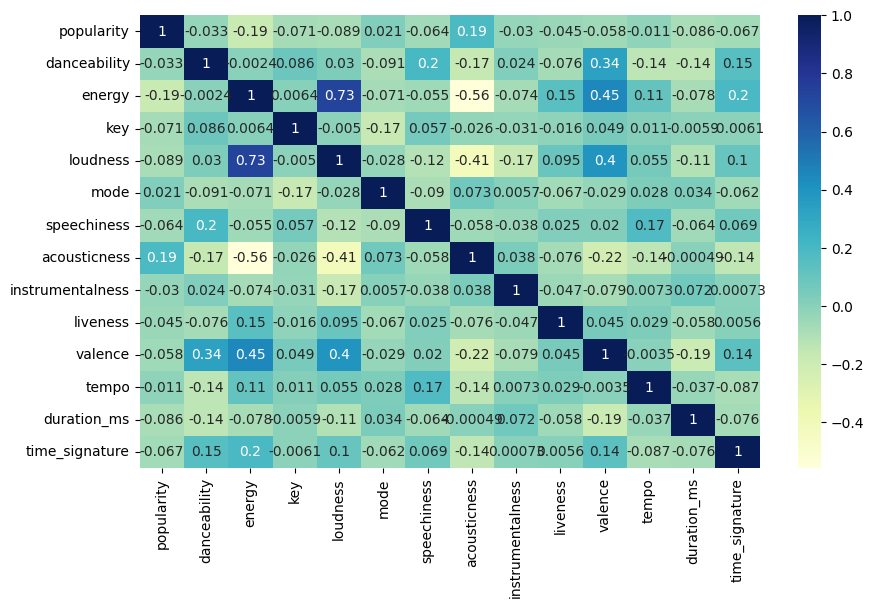

In [35]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.heatmap(df_b.corr(), cmap="YlGnBu", annot=True);

It looks like speechiness and loudness are positively correlated with each other.

Also, valence is positively correlated with danceability and energy. Considering happy songs make people energetic and want to dance, the correlation obviously makes sense.

Interestingly enough, tempo and danceability are very negatively correlated.

As seen above, energy, valence, and danceability are positively correlated. Let’s see how these variables are distributed

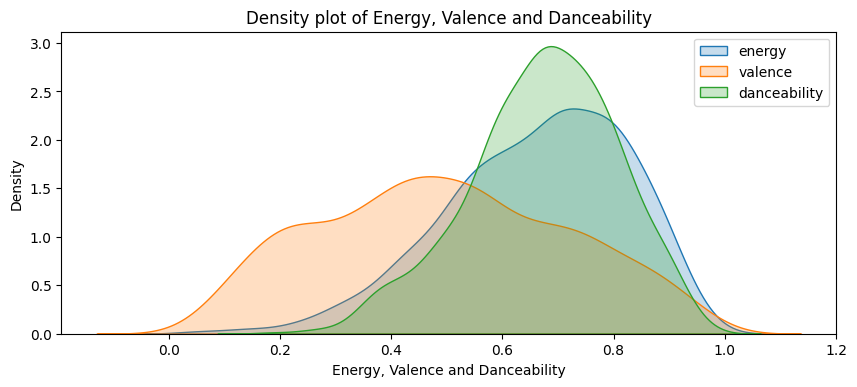

In [36]:
plt.figure(figsize=(10, 4), dpi=100)
sns.kdeplot(df['energy'], shade=True, label="energy")
sns.kdeplot(df['valence'], shade=True, label="valence")
sns.kdeplot(df['danceability'], shade=True, label="danceability")

plt.xlabel('Energy, Valence and Danceability')
plt.ylabel('Density')
plt.title('Density plot of Energy, Valence and Danceability')

plt.legend()
plt.show();

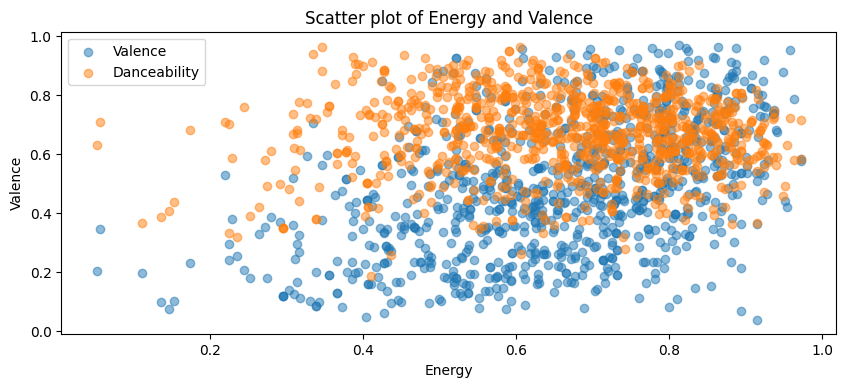

In [37]:
plt.figure(figsize=(10, 4), dpi=100)
plt.scatter(df_b['energy'], df_b['valence'], alpha=0.5, label="Valence")
plt.scatter(df_b['energy'], df_b['danceability'], alpha=0.5, label="Danceability")
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.title('Scatter plot of Energy and Valence')
plt.legend();
plt.show();

### **Tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

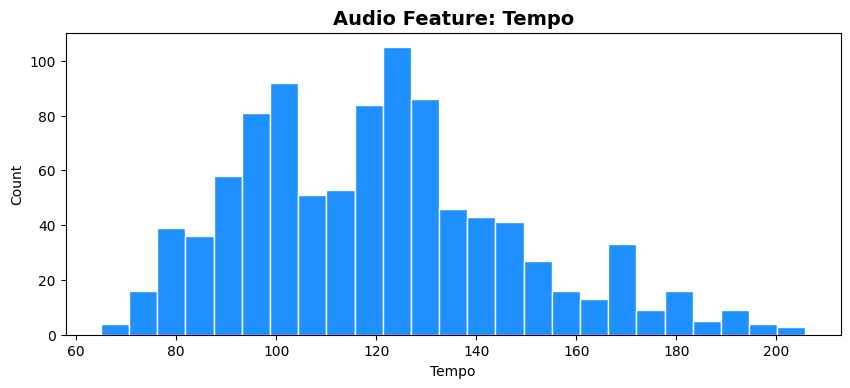

observed value :  970
Maximum value : 205.85
Minimum value : 64.93
Mean value :  120.25
The variance : 739.15
The Standard deviation :  27.19


In [38]:
tempo = df['tempo']

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
ax.hist(tempo, bins=25, color='dodgerblue', edgecolor='white')

# Set the labels and title
ax.set_xlabel("Tempo")
ax.set_ylabel("Count")
ax.set_title("Audio Feature: Tempo")
ax.title.set_size(14)
ax.title.set_weight('bold')

# Set axes limits

plt.show();
print("observed value : ", tempo.count())
print("Maximum value :", round(tempo.max(), 2))
print("Minimum value :", round(tempo.min(), 2))
print("Mean value : ", round(tempo.mean(), 2))
print("The variance :", round(tempo.var(), 2))
print("The Standard deviation : ", round(tempo.std(), 2))

**[Tempo Markings](https://en.wikipedia.org/wiki/Tempo)**

- Grave – very slow (25–45 bpm)
- Largo – broadly (40–60 bpm)
- Larghetto – rather broadly (60–66 bpm)
- Adagio – slowly with great expression (66–76 bpm)
- Andante – at a walking pace (76–108 bpm)
- Moderato – at a moderate speed (108–120 bpm)
- Allegro – fast, quickly, and bright (120–156 bpm)
- Vivace – lively and fast (156–176 bpm)
- Presto – very, very fast (176–200 bpm)
- Prestissimo – even faster than presto (200 bpm and over)

In [39]:
df['tempo_marking'] = None    
df['tempo_marking'].where(~(df['tempo'] > 25) & (df['tempo'] < 45), "grave", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 45) & (df['tempo'] < 60), "largo", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 60) & (df['tempo'] < 66), "larghetto", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 66) & (df['tempo'] < 76), "adagio", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 76) & (df['tempo'] < 108), "andante", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 108) & (df['tempo'] < 120), "moderato", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 120) & (df['tempo'] < 156), "allegro", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 156) & (df['tempo'] < 176), "vivace", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 176) & (df['tempo'] < 200), "presto", inplace=True)
df['tempo_marking'].where(~(df['tempo'] > 200), "prestissimo", inplace=True)

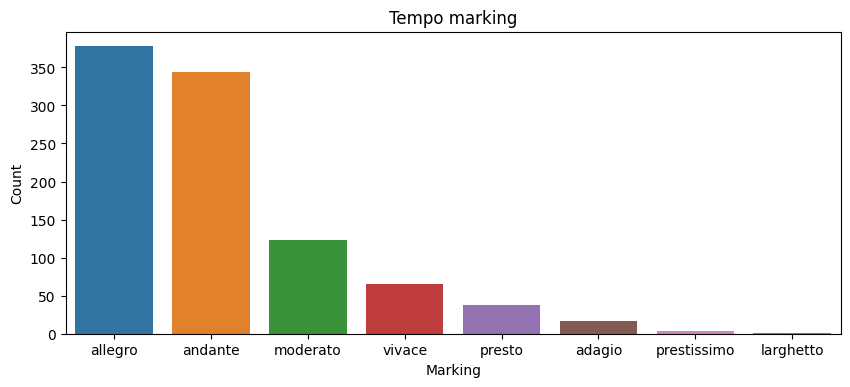

In [47]:
# group by 'key' and calculate the count of each key
song_keys = df.groupby('tempo_marking').size().reset_index(name='n_key')

# sort the keys by count of occurrences
song_keys = song_keys.sort_values('n_key', ascending=False)

# sort categorical order
song_keys['tempo_marking'] = pd.Categorical(song_keys['tempo_marking'], categories=song_keys['tempo_marking'].tolist())

# plot the bar graph
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
sns.barplot(x='tempo_marking', y='n_key', data=song_keys)
ax.set_title('Tempo marking')
ax.set_xlabel('Marking')
ax.set_ylabel('Count')

plt.show();